In [96]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from BS_pricer import BS_pricer
from Parameters import Option_param
from Processes import Diffusion_process

Den originale ligning (3.81) kan omskrives:

\begin{align*}
S\left(t\right)&=S\left(0\right)e^{\left(\mu-\frac{1}{2}\sigma^{2}\right)t+\sigma W\left(t\right)}\prod_{J=1}^{N\left(t\right)}Y_{J}\\\ln\left(S\left(t\right)\right)&=\ln\left(S\left(0\right)e^{\left(\mu-\frac{1}{2}\sigma^{2}\right)t+\sigma W\left(t\right)}\prod_{J=1}^{N\left(t\right)}Y_{J}\right)\\\ln\left(S\left(t\right)\right)&=\ln\left(S\left(0\right)\right)+\ln\left(e^{\left(\mu-\frac{1}{2}\sigma^{2}\right)t+\sigma W\left(t\right)}\right)+\ln\left(\prod_{J=1}^{N\left(t\right)}Y_{J}\right)\\\ln\left(S\left(t\right)\right)&=\ln\left(S\left(0\right)\right)+\left(\mu-\frac{1}{2}\sigma^{2}\right)t+\sigma W\left(t\right)+\sum_{J=1}^{N\left(t\right)}Y_{J}\\\exp\left(\ln\left(S\left(t\right)\right)\right)&=\exp\left(\ln\left(S\left(0\right)\right)+\left(\mu-\frac{1}{2}\sigma^{2}\right)t+\sigma W\left(t\right)+\sum_{J=1}^{N\left(t\right)}Y_{J}\right)\\S_{t}&=S\left(0\right)\exp\left(\underset{GBM}{\underbrace{\left(\mu-\frac{1}{2}\sigma^{2}\right)t+\sigma W\left(t\right)}}+\underset{\text{Jumps}}{\underbrace{\sum_{J=1}^{N\left(t\right)}Y_{J}}}\right)
\end{align*}

In [196]:
# set seed
def merton_jump_path(S0, T, mu, sigma, lam, I, m, v):

    X = np.zeros(I)
    S = np.zeros(I)

    X[0] = np.log(S0)
    S[0] = S0
    dt = T / I

    for i in range(1,I):
        Z = np.random.standard_normal()
        N = np.random.poisson(lam * dt)
        Y = np.exp(np.random.normal(m,v,N))

        if N == 0:
            M = 0

        else:
            for j in range(N):
                M = np.sum(np.log(Y))
                
        X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
        S[i] = np.exp(X[i])

    return S


In [245]:
S0 = 100
T = 1
mu = 0.05
sigma = 0.2
lam = 1
I = 1000
m = 0
v = 0.3
paths = 1000

def matrix(paths):
    matrix = np.zeros((paths, I))
    for k in range(paths):
        X = np.zeros(I)
        S = np.zeros(I)

        X[0] = np.log(S0)
        S[0] = S0
        dt = T / I
    
        for i in range(1,I):
            Z = np.random.standard_normal()
            N = np.random.poisson(lam * dt)
            Y = np.exp(np.random.normal(m,v,N))
    
            if N == 0:
                M = 0
    
            else:
                for j in range(N):
                    M = np.sum(np.log(Y))
                    
            X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
            S[i] = np.exp(X[i])
        matrix[k] = S
    return matrix

S = matrix(paths)
S.shape


(1000, 1000)

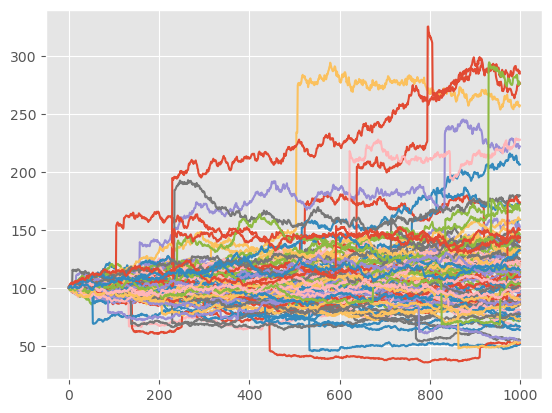

In [226]:
S0 = 100
T = 1
mu = 0.05
sigma = 0.2
lam = 1
I = 1000
m = 0
v = 0.3
paths = 100

def matrix(paths):
    matrix = np.zeros((paths, I))
    for i in range(paths):
        matrix[i] = merton_jump_path(S0, T, mu, sigma, lam, I, m, v)
    return matrix


matSrix = matrix(paths)
matrix.shape


In [188]:
for i in range(10):
    print(merton_jump_path(100, 1, 0.05, 0.2, 0.5, 10))

[100.         104.77036119  95.87754505  97.46666559  99.71718334
 106.84379658 107.74838314 127.71936709 122.87387235 104.85100285]
[100.         101.04301323 105.90724186  96.92423649 104.02537524
          nan          nan          nan          nan          nan]
[100.          96.90627269  79.1001752   78.35626141  81.41534094
  76.55874473  73.18794426  69.31150691  70.99488579  69.52635531]
[100.         105.0922841  107.83470758 102.41079911 105.80275831
 115.25265973  74.30617533  70.83186781  74.58561369  68.35194307]
[100.         107.71956839 116.74944656 130.79264028 130.04673449
 130.77036491 129.47408714 141.45114178 141.31434181 144.55079306]
[100.          91.12081037  97.47269012  91.98672842  92.1115741
  92.56170739  91.99960374  95.38130551 106.09849682  99.81028244]
[100.          90.0001305   92.51045265  95.27945491  93.4790664
 103.34060438 100.90623927 110.62999942 115.16276867 111.47711918]
[100.          85.60330098  83.62029424  82.76297963  82.30808653
  89.

/var/folders/3l/9tdvgjyd6v12z560tdqxmwlm0000gn/T/ipykernel_10199/2152507699.py:21: RuntimeWarning: invalid value encountered in log
  M = np.sum(np.log(Y))


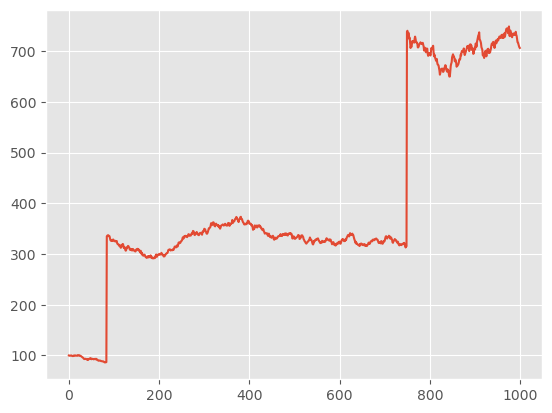

In [157]:
import numpy as np

def merton_jump_paths(S0, T, mu, sigma, lam, Y_mean, Y_std, I, x):
    np.random.seed(1000)
    
    # Initialize log-price and price matrices
    X = np.zeros((x, I))
    S = np.zeros((x, I))

    X[:, 0] = np.log(S0)
    S[:, 0] = S0
    dt = T / I

    for i in range(1, I):
        Z = np.random.standard_normal(x) # x standard normals
        N = np.random.poisson(lam * dt, x) # x poisson values

        # Calculate cumulative sum of log-jump sizes for each path
        M = np.asarray([np.sum(np.log(np.exp(np.random.normal(Y_mean, Y_std, n)))) if n > 0 else 0 for n in N])
        
        X[:, i] = X[:, i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
        S[:, i] = np.exp(X[:, i])

    return S

# Test
S0 = 100
T = 1
mu = 0.05
sigma = 0.2
lam = 1
Y_mean = 0
Y_std = 1
I = 1000
x = 1  # Number of paths

paths = merton_jump_paths(S0, T, mu, sigma, lam, Y_mean, Y_std, I, x)

plt.plot(paths.T)

In [143]:
paths.shape

(10, 1000)

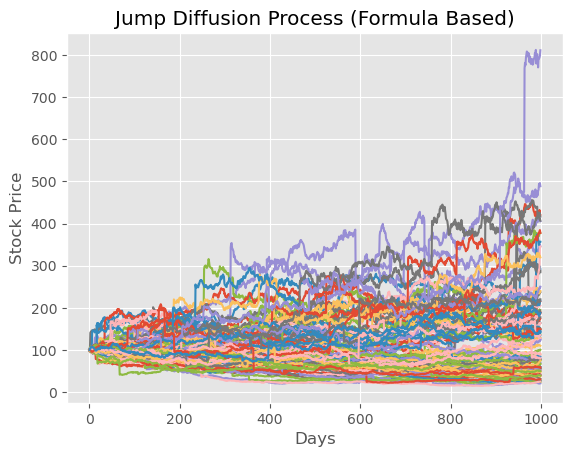

In [202]:
np.random.seed(1)
def merton_jump_paths_formula(S0, T, mu, sigma, lam, m, v, I, Npaths):

    dt = T / I  # Time increment
    t = np.linspace(0, T, I)  # Time grid
    
    # GBM component
    # Generate random Brownian motion paths
    W = np.random.randn(I, Npaths).cumsum(axis=0) * np.sqrt(dt)  # Cumulative sum of standard normals times sqrt(dt) gives W(t)
    # Calculate the geometric Brownian motion component for each path and time step
    GBM = np.zeros((I, Npaths))
    GBM[1:] = (mu - 0.5 * sigma**2) * t[1:, np.newaxis] + sigma * W[1:] #ensure it starts at 0
    
    # Jump component
    # Generate Poisson processes for jumps for each path and time step
    N = np.random.poisson(lam * dt, (I, Npaths)).cumsum(axis=0)  # Cumulative sum of Poisson gives N(t)
    # Generate jump sizes for each potential jump event; these are drawn from a log-normal distribution
    Y = np.exp(np.random.normal(m, v, (I, Npaths)))  # Jump sizes, which are log-normal
    # Initialize a matrix to hold the cumulative sum of jumps for each path
    jumps = np.zeros((I, Npaths))
    
    # Calculate the cumulative sum of jumps for each path
    for i in range(1, I):
        # For each time step, if there is a new jump (N[i] > N[i-1]), add its logarithm to the cumulative sum of jumps
        jumps[i] = jumps[i - 1] + np.where(N[i] > N[i - 1], np.log(Y[i]), 0)
    
    # Calculate the final price paths by combining the GBM and jump components and multiplying by the initial stock price
    return S0 * np.exp(GBM + jumps)


# Parameters
S0 = 100  # current stock price
T = 5  # time to maturity
mu = 0.02  # risk free rate
m = 0  # mean of jump size
v = 0.3  # standard deviation of jump
lam = 1  # intensity of jump i.e. number of jumps per annum
I = 1000 # time steps
Npaths = 100  # number of paths to simulate
sigma = 0.2  # annual standard deviation, for Wiener process

# Simulate paths
j = merton_jump_paths_formula(S0, T, mu, sigma, lam, m, v, I, Npaths)
m = j.T

# Plotting
plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process (Formula Based)')
plt.show()

# LSM approach

In [260]:
V = S[:, -1] # Terminal value
K=110 # Strike price
payoff_matrix = np.maximum(K - S, 0) #intrinsics value of the option
df = np.exp(-mu*T)

# Let us compute the value of the American put with backward induction
for i in range(I-1, 0, -1):  # count down backwards with -1 time steps from T to 0

    # Identify in-the-money paths
    in_the_money_indices = np.where(S[:, i] < K)[0]
    
    # If there are any in-the-money paths, perform regression on them
    if len(in_the_money_indices) > 0:
        rg = np.polyfit(S[in_the_money_indices, i], V[in_the_money_indices] * df, 3)  # fits a polynomial of degree 3 to the in-the-money data
        C = np.polyval(rg, S[in_the_money_indices, i])  # evaluates the polynomial at in-the-money paths

        V[in_the_money_indices] = np.where(payoff_matrix[in_the_money_indices, i] > C, payoff_matrix[in_the_money_indices, i], V[in_the_money_indices] * df)

V0 = df * np.mean(V)

print('The value of the American put option is: ', round(V0, 2))

The value of the American put option is:  9.52


In [262]:
H = np.maximum(K - S, 0)  # intrinsic values for put option
V = np.zeros_like(H)  # value matrix
V[:, -1] = H[:, -1]

# Valuation by LS Method
for t in range(I - 2, 0, -1):
    good_paths = H[:, t] > 0  # paths where the intrinsic value is positive
    # the regression is performed only on these paths

    rg = np.polyfit(S[good_paths, t], V[good_paths, t + 1] * df, 2)  # polynomial regression
    C = np.polyval(rg, S[good_paths, t])  # evaluation of regression

    exercise = np.zeros(len(good_paths), dtype=bool)  # initialize
    exercise[good_paths] = H[good_paths, t] > C  # paths where it is optimal to exercise

    V[exercise, t] = H[exercise, t]  # set V equal to H where it is optimal to exercise
    V[exercise, t + 1 :] = 0  # set future cash flows, for that path, equal to zero
    discount_path = V[:, t] == 0  # paths where we didn't exercise
    V[discount_path, t] = V[discount_path, t + 1] * df  # set V[t] in continuation region

V0 = np.mean(V[:, 1]) * df  # discounted expectation of V[t=1]
print("Example price= ", V0)

Example price=  9.5228368140959


In [264]:
df = np.exp(-mu*T)  # discount factor
# Let us compute the value of american put with backward induction
for i in range (I-1, 0, -1): #count down backwards with -1 time steps from T to 0
    rg = np.polyfit(S[:, i], V*df, 3) #fits a polynomial of degree 3 to the data

    C = np.polyval(rg, S[:, i]) # evaluates the polynomial at m[:, i]

    V = np.where(payoff_matrix[:, i] > C, payoff_matrix[:, i], V*df)

V0 = df*np.mean(V)

print('The value of the American put option is: ', round(V0, 2))


The value of the American put option is:  9.66


A potential issue here is that when you're using regression to estimate the continuation values, you're using the entire dataset. In reality, you should only be regressing on "in-the-money" paths. So, you might want to add a filtering step to only consider paths where exercising the option is a possibility (i.e., paths where the intrinsic value is positive).

m[:, i] represents the stock prices at time step i for all simulated paths.
V*df represents the discounted expected future payoffs of the option from the next time step.

Text(0.5, 1.0, 'Jump Diffusion Process')

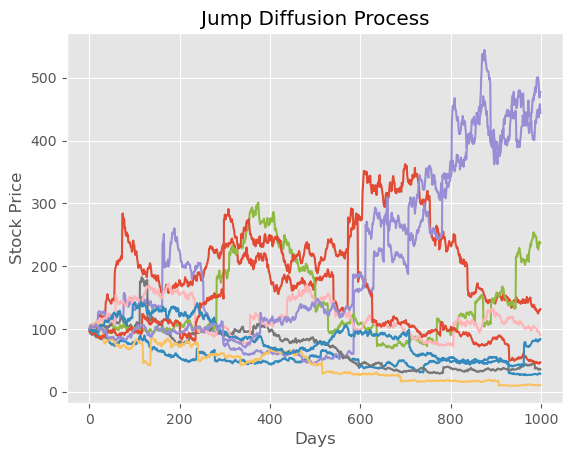

In [103]:
def merton_jump_paths(S0, T, mu, sigma,  lam, m, v, I, Npaths):
    size=(I,Npaths)
    dt = T/I 

    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size), np.random.normal(m,v, size=size)).cumsum(axis=0)

    geo = np.cumsum(((mu -  sigma**2/2 -lam*(m  + v**2*0.5))*dt + sigma*np.sqrt(dt) * np.random.normal(size=size)), axis=0)
    
    return np.exp(geo+poi_rv)*S0

S0 = 100 # current stock price
T = 10 # time to maturity
mu = 0.02 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam =1 # intensity of jump i.e. number of jumps per annum
I = 1000 # time steps
Npaths = 10 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process

j = merton_jump_paths(S0, T, mu, sigma, lam, m, v, I, Npaths)

plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

[[100.          98.51793907 103.30361213 ...  87.05275182  85.10484764
   84.95043251]
 [100.         100.46420226 100.28589573 ... 123.32517856 123.35257238
  121.76494132]
 [100.          97.7450637   95.78739455 ...  88.49390864  86.89517025
   87.21984995]
 ...
 [100.         101.02086798 101.28819614 ... 151.27090348 149.48659618
  148.6862883 ]
 [100.          99.9697987  101.24584175 ... 123.91383976 126.9816016
  125.94194115]
 [100.         101.5679252  102.61467762 ...  92.03846844  91.11113835
   95.09438077]]


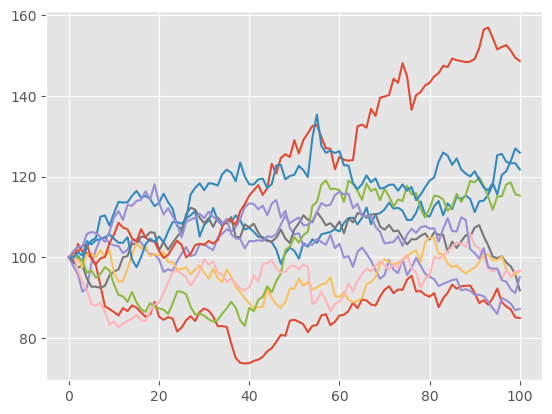

In [104]:
import numpy as np

def sample_paths_merton(S0, T, mu, sigma, lam, Y_dist, I, Npaths):
    """
    Simulate sample paths using the modified Merton Jump Diffusion model.

    Parameters:
    - S0: Initial asset price
    - T: Total time
    - mu: Expected return (drift)
    - sigma: Volatility of the continuous component
    - lam: Expected number of jumps in one time unit
    - Y_dist: A function that generates a random number from the Y distribution
    - I: Number of time intervals (steps)
    - Npaths: Number of paths to simulate

    Returns:
    - A 2D array of asset prices with shape (Npaths, I+1)
    """
    
    dt = T / I  # Time step size
    paths = np.zeros((Npaths, I+1))
    
    for path in range(Npaths):
        paths[path, 0] = S0
        X = np.log(S0)
        
        for i in range(1, I+1):
            Z = np.random.normal(0, 1)
            N = np.random.poisson(lam * dt)
            M = np.sum(np.log(Y_dist(size=N)))

            X += (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z + M
            paths[path, i] = np.exp(X)
    
    return paths

# Test the function using a uniform distribution for Y
Y_distribution = lambda size: np.random.uniform(0.9, 1.1, size)
paths = sample_paths_merton(S0=100, T=1, mu=0.05, sigma=0.2, lam=0.8, Y_dist=Y_distribution, I=100, Npaths=10)
print(paths)

plt.plot(paths.T)


[[100.         104.2306659  103.65024549 ...  86.05718036  87.86128086
   91.26548384]
 [100.          97.09907729  98.37547164 ...   0.           0.
    0.        ]
 [100.         102.09122711 102.62750105 ...  80.2819392   79.02586916
   77.03702678]
 ...
 [100.         106.13595221 109.04984708 ...   0.           0.
    0.        ]
 [100.         101.71197099 102.86041861 ...   0.           0.
    0.        ]
 [100.          98.09825363  95.57067164 ...   0.           0.
    0.        ]]


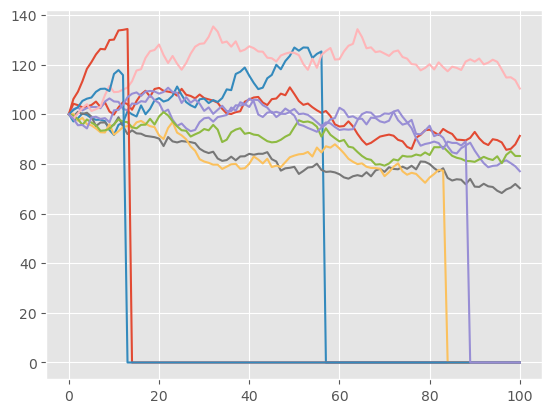

In [105]:
import numpy as np

def sample_paths_merton_drop(S0, T, mu, sigma, lam, I, Npaths):
    """
    Simulate sample paths using Merton Jump Diffusion model.

    Parameters:
    - S0: Initial asset price
    - T: Total time
    - mu: Expected return (drift)
    - sigma: Volatility of the continuous component
    - lam: Jump intensity
    - I: Number of time intervals (steps)
    - Npaths: Number of paths to simulate

    Returns:
    - A 2D array of asset prices with shape (Npaths, I+1)
    """
    
    dt = T / I  # Time step size
    paths = np.zeros((Npaths, I+1))
    
    for path in range(Npaths):
        paths[path, 0] = S0
        X = np.log(S0)
        
        for i in range(1, I+1):
            Z = np.random.normal(0, 1)
            N = np.random.poisson(lam * dt)

            if N == 0 and paths[path, i-1] > 0:
                X += (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
                paths[path, i] = np.exp(X)
            else:
                paths[path, i] = 0
    
    return paths

# Test the function
paths_1 = sample_paths_merton_drop(S0=100, T=1, mu=0.05, sigma=0.2, lam=0.8, I=100, Npaths=10)
print(paths_1)

plt.plot(paths_1.T)